In [1]:
总结第一次特征工程，比较顺便，没有进行EAD，也没有构造大量其他特征，导致训练出的模型mae比较低。

In [ ]:
import pandas as pd

In [2]:
car_df=pd.read_csv(r'E:\Machine Learning\used_car_testA_20200313\used_car_testA_20200313.csv',sep=' ')
car_df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [3]:
#我首先将几个变化不大的特征删除了，这样其实有些问题，第一，不应该在没有对数据集进行EAD前，对数据还不是很了解
#就删除特征
drop_list=['SaleID','name','offerType','seller']
car_df.drop(drop_list,axis=1,inplace=True)
print(car_df.shape)

(50000, 26)


In [4]:
#第二步自己尝试构造一个时间差的特征，花了很多时间，好在完成了
car_df['regDate_lis']=car_df['regDate'].astype(str)
car_df['creatDate_lis']=car_df['creatDate'].astype(str)
def time_list(item):
    lis=list(item)
    if lis[4]=='0'and lis[5]=='0':
        lis[5]='1'
    j=''.join(lis[:4])+'-'+''.join(lis[4:6])+'-'+''.join(lis[6:])
    return j
car_df['regDate_lis']=car_df['regDate_lis'].apply(time_list)
car_df['creatDate_lis']=car_df['creatDate_lis'].apply(time_list)
car_df.head()  

,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regDate_lis,creatDate_lis
0,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,...,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654,2011-12-12,2016-03-29
1,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,...,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055,1999-02-11,2016-04-04
2,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,...,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033,2009-03-04,2016-03-08
3,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,...,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775,2010-04-05,2016-03-25
4,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,...,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290,1997-07-03,2016-03-09


In [5]:
#将时间差进行除以30，认为这样数据的尺度会减小，但其实应该用数据分桶的方法，只是我不知道
car_df['creatDate_lis']=pd.to_datetime(car_df['creatDate_lis'])
car_df['regDate_lis']=pd.to_datetime(car_df['regDate_lis'])
car_df['used_time']=(car_df['creatDate_lis']-car_df['regDate_lis'])/30
car_df['used_time']=car_df['used_time'].dt.days
car_df.head()

,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regDate_lis,creatDate_lis,used_time
0,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,...,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654,2011-12-12,2016-03-29,52
1,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,...,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055,1999-02-11,2016-04-04,208
2,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,...,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033,2009-03-04,2016-03-08,85
3,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,...,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775,2010-04-05,2016-03-25,72
4,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,...,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290,1997-07-03,2016-03-09,227


In [6]:
#然后对时间进行尺度缩减
drop_list=['creatDate_lis','regDate_lis']
car_df.drop(drop_list,axis=1,inplace=True)
car_df['regDate']=car_df['regDate']/10000
car_df['creatDate']=car_df['creatDate']/10000
car_df.shape
#检查空缺值
check_null=car_df.isnull().sum().sort_values(ascending=False)/float(len(car_df))
check_null


fuelType             0.05786
gearbox              0.03820
bodyType             0.02826
used_time            0.00000
v_1                  0.00000
model                0.00000
brand                0.00000
power                0.00000
kilometer            0.00000
notRepairedDamage    0.00000
regionCode           0.00000
creatDate            0.00000
v_0                  0.00000
v_2                  0.00000
v_14                 0.00000
v_3                  0.00000
v_4                  0.00000
v_5                  0.00000
v_6                  0.00000
v_7                  0.00000
v_8                  0.00000
v_9                  0.00000
v_10                 0.00000
v_11                 0.00000
v_12                 0.00000
v_13                 0.00000
regDate              0.00000
dtype: float64

In [7]:
#将缺失值用均值填充
car_df.drop('creatDate',axis=1,inplace=True)
for column in list(car_df.columns[car_df.isnull().sum() > 0]):
    mean_val = car_df[column].mean()
    car_df[column].fillna(mean_val, inplace=True)
#填充完没有缺失值了
check_null=car_df.isnull().sum().sort_values(ascending=False)/float(len(car_df))
check_null

used_time            0.0
v_14                 0.0
model                0.0
brand                0.0
bodyType             0.0
fuelType             0.0
gearbox              0.0
power                0.0
kilometer            0.0
notRepairedDamage    0.0
regionCode           0.0
v_0                  0.0
v_1                  0.0
v_2                  0.0
v_3                  0.0
v_4                  0.0
v_5                  0.0
v_6                  0.0
v_7                  0.0
v_8                  0.0
v_9                  0.0
v_10                 0.0
v_11                 0.0
v_12                 0.0
v_13                 0.0
regDate              0.0
dtype: float64

In [8]:
#对我认为跨度大的特征进行标准化
import numpy as np
sc_lis=['model','brand','regDate',  'power','kilometer',  'regionCode', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_10', 'v_11','v_12', 'v_13', 'v_14', 'used_time']
z_scaler = lambda x : (x - np.mean(x)) / np.std(x)
# 个别列进行标准化处理
df3 = car_df[sc_lis].apply(z_scaler)
car_df.drop(sc_lis,axis=1,inplace=True)
car_df = pd.concat([car_df, df3], axis=1)
pd.set_option('display.max_columns',len(car_df.columns))
car_df.head()

,bodyType,fuelType,gearbox,notRepairedDamage,v_5,v_6,v_7,v_8,v_9,model,brand,regDate,power,kilometer,regionCode,v_0,v_1,v_2,v_3,v_4,v_10,v_11,v_12,v_13,v_14,used_time
0,5.0,1.0,1.0,0.0,0.264405,0.121800,0.070899,0.106558,0.078867,3.540708,-0.518741,1.439525,1.043334,0.615108,-0.613018,2.129651,1.450589,0.332805,-2.075956,0.605635,-1.876524,-0.260237,1.913285,0.484350,-3.568573,-1.510615
1,0.0,0.0,0.0,1.0,0.261745,0.000000,0.096733,0.013705,0.052383,-0.562867,1.655340,-0.814250,-0.242489,-0.024452,1.506909,-0.832251,-0.883099,-0.631684,1.757702,-0.620779,0.986479,-0.221370,-1.503437,-1.195479,-0.738377,0.866159
2,0.0,0.0,0.0,0.0,0.260216,0.112081,0.078082,0.062078,0.050540,0.710656,1.655340,1.050091,-0.058800,-1.431483,1.307650,0.585671,1.301684,0.036711,-0.593678,-0.204659,-1.309740,0.314075,0.333918,0.109882,0.732484,-1.007836
3,0.0,0.0,1.0,0.0,0.260466,0.106727,0.081146,0.075971,0.048268,-0.946946,-1.030289,1.238233,0.216733,-1.431483,0.763150,0.832295,1.195981,0.132466,-1.047405,-0.209350,-1.293183,0.160693,0.748800,0.286950,1.276352,-1.205900
4,2.0,0.0,0.0,0.0,0.250999,0.000000,0.077806,0.028600,0.081709,-0.421365,0.760130,-1.177607,-0.242489,0.615108,0.272993,-0.919217,-0.859018,-0.568072,1.243284,0.312232,0.969685,-0.204100,-1.265585,-0.017513,-0.100069,1.155638


In [10]:
#选出标签列及数据列
y=car_df.ix[:,'price']
x=car_df.ix[:,car_df.columns!='price']
#储存数据
car_df.to_csv('E:\Machine Learning\car_testA.csv',index=False,sep=',')
#y.to_csv('E:\Machine Learning\car_train_target.csv',index=False,sep=',')

In [ ]:
#这一步忘了是要干什么了，好像是切分数据集
#from sklearn.model_selection import train_test_split
#def data_prepration(x):
    #从数据集中取出数据和标签，并划分数据训练集和测试集
    x_features=x.ix[:,x.columns!='price']
    x_labels=x.ix[:,x.columns=='price']
    x_features_train,x_features_test,x_labels_train,x_labels_test=train_test_split(x_features,x_labels,test_size=0.2,random_state=18)
    return (x_features_train,x_features_test,x_labels_train,x_labels_test)
#x=loans_ml_df[col_new]
#y=loans_ml_df['loans_status']
#df=car_df
#data_train_x,data_test_x,data_train_y,data_test_y=data_prepration(df)
#print(len(data_test_y['price']))
#print(len(data_train_y['price']))

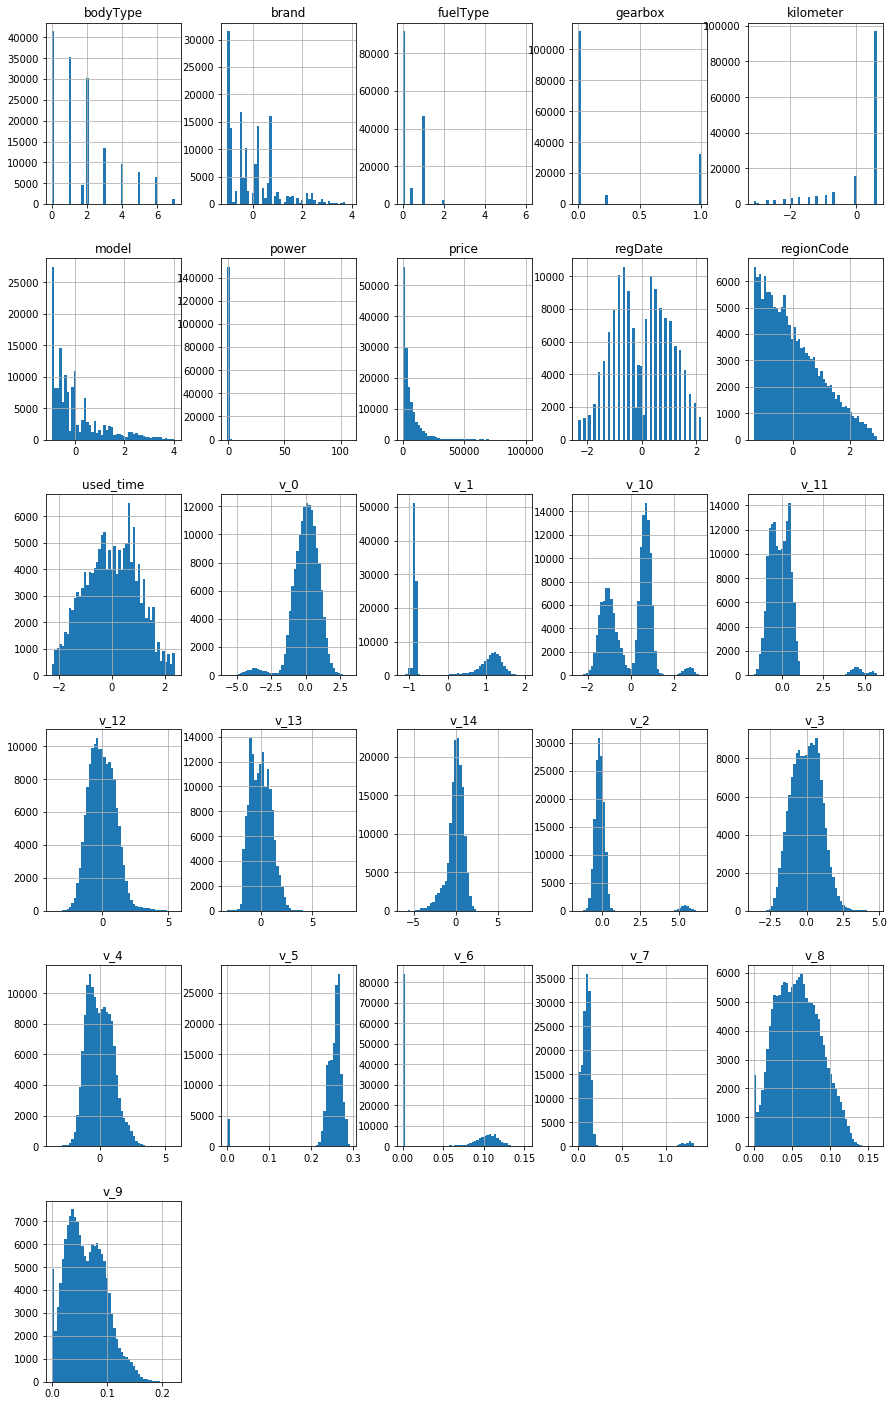

In [12]:
#这才是我们第一步需要做的，探索性分析数据，先通过图表看数据分布特征
import matplotlib.pyplot as plt
car_df.hist(bins=50,figsize=(15,25))#bins 柱子个数
#plt.savefig('a.jpg')  #保存图片
plt.show()